# Temporal Profiling

## Setup

### Library Imports

In [72]:
import os, re
from pathlib import Path

import dask.dataframe as dd
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client

client = Client(processes=False)
client

<Client: 'inproc://10.120.43.24/47846/1' processes=1 threads=16, memory=64.42 GB>

### Path Dictionary

In [3]:
path = {'root': Path(os.getcwd()).parent}

path['samples'] = Path(path['root'], 'classification', 'features', 'samples', 'onetile', 'samples_100_random', 'samples_100_random.parquet')
path['nom_path'] = Path(path['root'], 'vector_data', 'nomenclature', 'nomenclature_revue_v1.csv')
path

{'root': PosixPath('/work/OT/biomass/tharen/forest-mapping'),
 'samples': PosixPath('/work/OT/biomass/tharen/forest-mapping/classification/features/samples/onetile/samples_100_random/samples_100_random.parquet'),
 'nom_path': PosixPath('/work/OT/biomass/tharen/forest-mapping/vector_data/nomenclature/nomenclature_revue_v1.csv')}

In [4]:
import pandas as pd
nompd = pd.read_csv(path['nom_path'], sep=';')

remove = [14, 15]
codes = nompd[nompd.consid==1 & ~nompd.CODE_merge.isin(remove)][['CODE_merge', 'Name_merge', 'Description_en']]
codes['Description_en'] = codes.groupby(['CODE_merge', 'Name_merge'])['Description_en'].transform(lambda x: ', '.join(x))
codes = codes.drop_duplicates()

# Manually edit descriptions
codes.loc[18, 'Description_en'] = 'Larix decidua and Mixed coniferous forest'
codes.loc[23, 'Description_en'] = 'Mix of deciduous and coniferous'

codes

CODE_merge Name_merge                                   Description_en
2            3        CHE                                   Deciduous oaks
3            9     FF_div    Evergreen oaks, Beech, Mixed deciduous forest
5            6        CHT                                        Chessnuts
6            7        ROB                             Robinia pseudoacacia
10          11         PM                                    Maritime pine
11          12         PS                                       Scots pine
12          17        PIN  Pinus nigra, Other pure pine, Mixed pine forest
13          17         PH                                 Pinus halepensis
14          17         PC                  Pinus uncinata and pinus cembra
17          18      SP_EP                                    Fir or Spruce
18          23     FC_div        Larix decidua and Mixed coniferous forest
19          20        DOU                                      Douglas fir
23          25      F_mix                  Mix of deciduous and coniferous
29          30        PEU                               Populus plantation

In [5]:
prefix = 'code_'

nomenclature = {}
nomenclature['codes'] = dict(zip([f'{prefix}{code}' for code in codes.CODE_merge], codes.Name_merge))
nomenclature['abbrv'] = dict(zip(codes.Name_merge, codes.Description_en))
nomenclature

{'codes': {'code_3': 'CHE',
  'code_9': 'FF_div',
  'code_6': 'CHT',
  'code_7': 'ROB',
  'code_11': 'PM',
  'code_12': 'PS',
  'code_17': 'PC',
  'code_18': 'SP_EP',
  'code_23': 'FC_div',
  'code_20': 'DOU',
  'code_25': 'F_mix',
  'code_30': 'PEU'},
 'abbrv': {'CHE': 'Deciduous oaks',
  'FF_div': 'Evergreen oaks, Beech, Mixed deciduous forest',
  'CHT': 'Chessnuts',
  'ROB': 'Robinia pseudoacacia',
  'PM': 'Maritime pine',
  'PS': 'Scots pine',
  'PIN': 'Pinus nigra, Other pure pine, Mixed pine forest',
  'PH': 'Pinus halepensis',
  'PC': 'Pinus uncinata and pinus cembra',
  'SP_EP': 'Fir or Spruce',
  'FC_div': 'Larix decidua and Mixed coniferous forest',
  'DOU': 'Douglas fir',
  'F_mix': 'Mix of deciduous and coniferous',
  'PEU': 'Populus plantation'}}

In [6]:
features = dd.read_parquet(path['samples'])
features

Dask DataFrame Structure:
                             code 01:Gray:Energy 01:Gray:Entropy 01:Gray:Correlation 01:Gray:Inverse Difference Moment 01:Gray:Inertia 01:Gray:Cluster Shade 01:Gray:Cluster Prominence 01:Gray:Haralick Correlation 01:Gray:LBP:1 01:Gray:LBP:2 01:Gray:LBP:3 01:Gray:LBP:4 01:Gray:LBP:5 01:Gray:LBP:6 01:Gray:LBP:7 01:Gray:LBP:8 01:Gray:LBP:9 01:Gray:LBP:10 01:Gray:LBP:11 01:Gray:LBP:12 01:Gray:LBP:13 01:Gray:LBP:14 01:Gray:LBP:15 01:Gray:Mean:2 01:Gray:Variance:2 01:Gray:Skewness:2 01:Gray:Kurtosis:2 01:Gray:Mean:3 01:Gray:Variance:3 01:Gray:Skewness:3 01:Gray:Kurtosis:3 01:Vegetation:NDVI 01:Water:NDWI 01:Soil:BI2 01:Vegetation:NDRE 01:NDVI:Energy 01:NDVI:Entropy 01:NDVI:Correlation 01:NDVI:Inverse Difference Moment 01:NDVI:Inertia 01:NDVI:Cluster Shade 01:NDVI:Cluster Prominence 01:NDVI:Haralick Correlation 01:NDWI:Energy 01:NDWI:Entropy 01:NDWI:Correlation 01:NDWI:Inverse Difference Moment 01:NDWI:Inertia 01:NDWI:Cluster Shade 01:NDWI:Cluster Prominence 01:NDWI:Haralick Correlation 01:BI2:Energy 01:BI2:Entropy 01:BI2:Correlation 01:BI2:Inverse Difference Moment 01:BI2:Inertia 01:BI2:Cluster Shade 01:BI2:Cluster Prominence 01:BI2:Haralick Correlation 01:NDRE:Energy 01:NDRE:Entropy 01:NDRE:Correlation 01:NDRE:Inverse Difference Moment 01:NDRE:Inertia 01:NDRE:Cluster Shade 01:NDRE:Cluster Prominence 01:NDRE:Haralick Correlation 01:NDVI:LBP:1 01:NDVI:LBP:2 01:NDVI:LBP:3 01:NDVI:LBP:4 01:NDVI:LBP:5 01:NDVI:LBP:6 01:NDVI:LBP:7 01:NDVI:LBP:8 01:NDVI:LBP:9 01:NDVI:LBP:10 01:NDVI:LBP:11 01:NDVI:LBP:12 01:NDVI:LBP:13 01:NDVI:LBP:14 01:NDVI:LBP:15 01:NDWI:LBP:1 01:NDWI:LBP:2 01:NDWI:LBP:3 01:NDWI:LBP:4 01:NDWI:LBP:5 01:NDWI:LBP:6 01:NDWI:LBP:7 01:NDWI:LBP:8 01:NDWI:LBP:9 01:NDWI:LBP:10 01:NDWI:LBP:11 01:NDWI:LBP:12 01:NDWI:LBP:13 01:NDWI:LBP:14 01:NDWI:LBP:15 01:BI2:LBP:1 01:BI2:LBP:2 01:BI2:LBP:3 01:BI2:LBP:4 01:BI2:LBP:5 01:BI2:LBP:6 01:BI2:LBP:7 01:BI2:LBP:8 01:BI2:LBP:9 01:BI2:LBP:10 01:BI2:LBP:11 01:BI2:LBP:12 01:BI2:LBP:13 01:BI2:LBP:14 01:BI2:LBP:15 01:NDRE:LBP:1 01:NDRE:LBP:2 01:NDRE:LBP:3 01:NDRE:LBP:4 01:NDRE:LBP:5 01:NDRE:LBP:6 01:NDRE:LBP:7 01:NDRE:LBP:8 01:NDRE:LBP:9 01:NDRE:LBP:10 01:NDRE:LBP:11 01:NDRE:LBP:12 01:NDRE:LBP:13 01:NDRE:LBP:14 01:NDRE:LBP:15 01:NDVI:Mean:2 01:NDVI:Variance:2 01:NDVI:Skewness:2 01:NDVI:Kurtosis:2 01:NDVI:Mean:3 01:NDVI:Variance:3 01:NDVI:Skewness:3 01:NDVI:Kurtosis:3 01:NDWI:Mean:2 01:NDWI:Variance:2 01:NDWI:Skewness:2 01:NDWI:Kurtosis:2 01:NDWI:Mean:3 01:NDWI:Variance:3 01:NDWI:Skewness:3 01:NDWI:Kurtosis:3 01:BI2:Mean:2 01:BI2:Variance:2 01:BI2:Skewness:2 01:BI2:Kurtosis:2 01:BI2:Mean:3 01:BI2:Variance:3 01:BI2:Skewness:3 01:BI2:Kurtosis:3 01:NDRE:Mean:2 01:NDRE:Variance:2 01:NDRE:Skewness:2 01:NDRE:Kurtosis:2 01:NDRE:Mean:3 01:NDRE:Variance:3 01:NDRE:Skewness:3 01:NDRE:Kurtosis:3 01:vh_asc 01:vv_asc 01:vh_des 01:vv_des 01:B2:Blue:490 01:B3:Green:560 01:B4:Red:670 01:B5:Vegetation red edge:705 01:B6:Vegetation red edge:740 01:B7:Vegetation red edge:780 01:B8:NIR:820 01:B8A:Narrow NIR:865 01:B11:SWIR:1650 01:B12:SWIR:2200 01:vh_asc:Energy 01:vh_asc:Entropy 01:vh_asc:Correlation 01:vh_asc:Inverse Difference Moment 01:vh_asc:Inertia 01:vh_asc:Cluster Shade 01:vh_asc:Cluster Prominence 01:vh_asc:Haralick Correlation 01:vv_asc:Energy 01:vv_asc:Entropy 01:vv_asc:Correlation 01:vv_asc:Inverse Difference Moment 01:vv_asc:Inertia 01:vv_asc:Cluster Shade 01:vv_asc:Cluster Prominence 01:vv_asc:Haralick Correlation 01:vh_des:Energy 01:vh_des:Entropy 01:vh_des:Correlation 01:vh_des:Inverse Difference Moment 01:vh_des:Inertia 01:vh_des:Cluster Shade 01:vh_des:Cluster Prominence 01:vh_des:Haralick Correlation 01:vv_des:Energy 01:vv_des:Entropy 01:vv_des:Correlation 01:vv_des:Inverse Difference Moment 01:vv_des:Inertia 01:vv_des:Cluster Shade 01:vv_des:Cluster Prominence 01:vv_des:Haralick Correlation 01:SAR:VH/VV_ASC 01:SAR:RVI_ASC 01:SAR:VH/VV_DES 01:SAR:RVI_DES 01:vh_asc:LBP:1 01:vh_asc:LBP:2 01:vh_asc:LBP:3 01:vh_asc:LBP:4 01:vh_asc:LBP:5 01:vh_asc:LBP:6 01:vh_asc:LBP:7 01:vh_asc:L

In [46]:
feats = sorted({f[3:] for f in features.columns if f != 'code'})
feats

['B11:SWIR:1650',
 'B12:SWIR:2200',
 'B2:Blue:490',
 'B3:Green:560',
 'B4:Red:670',
 'B5:Vegetation red edge:705',
 'B6:Vegetation red edge:740',
 'B7:Vegetation red edge:780',
 'B8:NIR:820',
 'B8A:Narrow NIR:865',
 'BI2:Cluster Prominence',
 'BI2:Cluster Shade',
 'BI2:Correlation',
 'BI2:Energy',
 'BI2:Entropy',
 'BI2:Haralick Correlation',
 'BI2:Inertia',
 'BI2:Inverse Difference Moment',
 'BI2:Kurtosis:2',
 'BI2:Kurtosis:3',
 'BI2:LBP:1',
 'BI2:LBP:10',
 'BI2:LBP:11',
 'BI2:LBP:12',
 'BI2:LBP:13',
 'BI2:LBP:14',
 'BI2:LBP:15',
 'BI2:LBP:2',
 'BI2:LBP:3',
 'BI2:LBP:4',
 'BI2:LBP:5',
 'BI2:LBP:6',
 'BI2:LBP:7',
 'BI2:LBP:8',
 'BI2:LBP:9',
 'BI2:Mean:2',
 'BI2:Mean:3',
 'BI2:Skewness:2',
 'BI2:Skewness:3',
 'BI2:Variance:2',
 'BI2:Variance:3',
 'Gray:Cluster Prominence',
 'Gray:Cluster Shade',
 'Gray:Correlation',
 'Gray:Energy',
 'Gray:Entropy',
 'Gray:Haralick Correlation',
 'Gray:Inertia',
 'Gray:Inverse Difference Moment',
 'Gray:Kurtosis:2',
 'Gray:Kurtosis:3',
 'Gray:LBP:1',
 'Gr

In [50]:
temporalfeats = ['code']+[f for f in features.columns if feats[0] in f]
features[temporalfeats]

['code',
 '01:B11:SWIR:1650',
 '02:B11:SWIR:1650',
 '03:B11:SWIR:1650',
 '04:B11:SWIR:1650',
 '05:B11:SWIR:1650',
 '06:B11:SWIR:1650',
 '07:B11:SWIR:1650',
 '08:B11:SWIR:1650',
 '09:B11:SWIR:1650',
 '10:B11:SWIR:1650',
 '11:B11:SWIR:1650',
 '12:B11:SWIR:1650']

In [26]:
features['01:Gray:Energy'].compute().describe()

count    915173.000000
mean          0.871440
std           0.220592
min           0.096626
25%           0.810912
50%           1.000000
75%           1.000000
max           1.000000
Name: 01:Gray:Energy, dtype: float64

In [92]:
tmpf = features[['code', '01:Gray:Energy', '02:Gray:Energy']].compute()
tmpf

code  01:Gray:Energy  02:Gray:Energy
0        25             1.0             1.0
1        25             1.0             1.0
2        25             1.0             1.0
3        25             1.0             1.0
4        25             1.0             1.0
...     ...             ...             ...
915168    9             1.0             1.0
915169    9             1.0             1.0
915170    9             1.0             1.0
915171    9             1.0             1.0
915172    9             1.0             1.0

[915173 rows x 3 columns]

In [93]:
tmpf.code.unique().size

12

In [94]:
tmpplt[0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ab513cf7cc0>,
      dtype=object)

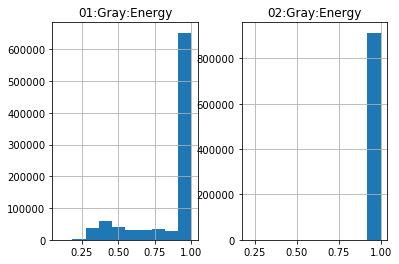

In [130]:
tmpf.hist()

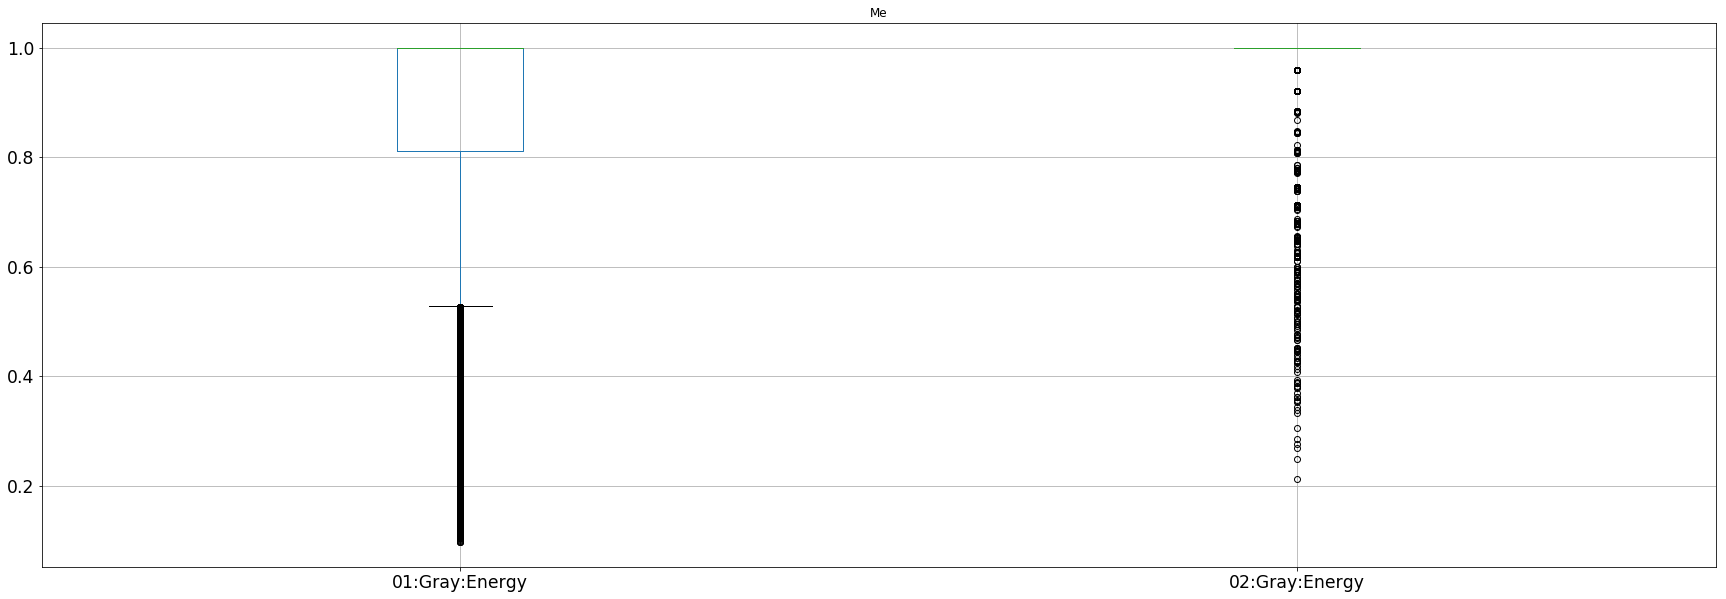

In [129]:
tmpplt = tmpf.boxplot(#by='code', 
                      fontsize='xx-large',
                      figsize=(30, 10), 
                      return_type='axes')#.values

plt.close()

tmpplt.set_title('Me')
tmpplt.set_facecolor('white')
tmpplt.patch.set_facecolor('white')

tmpplt.figure

## By Feature

## By Code

### And By Date

In [24]:
imbalance = 1

szdf = features.groupby(by='code').size().compute()
mincount = szdf.min()

In [24]:
resample = lambda df: df.sample(frac=min(mincount*imbalance/len(df), 1))

In [27]:
samplesdf = features.groupby('code')#.apply(resample)#.reset_index(level=0, drop=True)
samplesdf

In [26]:
samplesdf.compute()

KeyboardInterrupt: 

## Sample Distribution

In [7]:
_ = features.hist(figsize=(35, 10*12))

AttributeError: 'DataFrame' object has no attribute 'hist'

## Class Distribution

In [ ]:
features.columns

In [34]:
{i[3:] for i in features.columns if '01:' in i}

{'B11:SWIR:1650',
 'B12:SWIR:2200',
 'B2:Blue:490',
 'B3:Green:560',
 'B4:Red:670',
 'B5:Vegetation red edge:705',
 'B6:Vegetation red edge:740',
 'B7:Vegetation red edge:780',
 'B8:NIR:820',
 'B8A:Narrow NIR:865',
 'BI2:Cluster Prominence',
 'BI2:Cluster Shade',
 'BI2:Correlation',
 'BI2:Energy',
 'BI2:Entropy',
 'BI2:Haralick Correlation',
 'BI2:Inertia',
 'BI2:Inverse Difference Moment',
 'BI2:Kurtosis:2',
 'BI2:Kurtosis:3',
 'BI2:LBP:1',
 'BI2:LBP:10',
 'BI2:LBP:11',
 'BI2:LBP:12',
 'BI2:LBP:13',
 'BI2:LBP:14',
 'BI2:LBP:15',
 'BI2:LBP:2',
 'BI2:LBP:3',
 'BI2:LBP:4',
 'BI2:LBP:5',
 'BI2:LBP:6',
 'BI2:LBP:7',
 'BI2:LBP:8',
 'BI2:LBP:9',
 'BI2:Mean:2',
 'BI2:Mean:3',
 'BI2:Skewness:2',
 'BI2:Skewness:3',
 'BI2:Variance:2',
 'BI2:Variance:3',
 'Gray:Cluster Prominence',
 'Gray:Cluster Shade',
 'Gray:Correlation',
 'Gray:Energy',
 'Gray:Entropy',
 'Gray:Haralick Correlation',
 'Gray:Inertia',
 'Gray:Inverse Difference Moment',
 'Gray:Kurtosis:2',
 'Gray:Kurtosis:3',
 'Gray:LBP:1',
 'Gr